# Create data

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
#1 million data 
x_data = np.linspace(0.0, 10.0, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
# y = 0.5x + 5 

y_true = (x_data * 0.5) + 5 + noise

In [7]:
my_data = pd.concat([pd.DataFrame(data = x_data, columns = ["X data"]), pd.DataFrame(data = y_true, columns = ["Y"])], axis = 1)

In [9]:
my_data.head()

,X data,Y
0,0.00000,5.169608
1,0.00001,5.210657
2,0.00002,5.115740
3,0.00003,4.269452
4,0.00004,5.837359


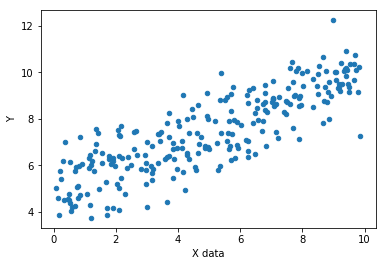

In [11]:
my_data.sample(250).plot(x = "X data", y = "Y", kind = "scatter")

# TensorFlow

In [12]:
import tensorflow as tf

In [13]:
#Variable 
m = tf.Variable(0.5)
b = tf.Variable(0.5)

#Placeholder
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

#Graph 
y_model = x * m + b 

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
#loss 
loss = tf.reduce_sum(tf.square(y_model - y))

In [28]:
#optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(loss)

In [29]:
#initialize variable 
init = tf.global_variables_initializer()


In [33]:
batch_size = 8

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {x: x_data[rand_ind], y: y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m, b])

In [34]:
model_m

0.53657705

In [35]:
model_b

4.963199

In [36]:
pred = model_m * x_data + model_b

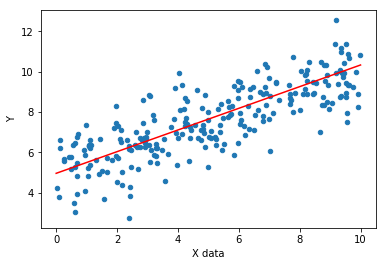

In [38]:
my_data.sample(250).plot(x = "X data", y = "Y", kind = "scatter")
plt.plot(x_data,pred, "r")

# tf.estimator API 

In [39]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[1])]

In [41]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpxgrc6wth', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B0AB5A7978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Train test split

In [42]:
from sklearn.model_selection import train_test_split 

In [44]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [46]:
x_eval.shape

(300000,)

## set up input function 

In [47]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8, num_epochs = None, shuffle=True)

In [48]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size= 8, num_epochs = 1000, shuffle=False)

In [49]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size= 8, num_epochs= 1000, shuffle=False)

## train estimator

In [50]:
estimator.train(input_fn = input_func, steps = 1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmpxgrc6wth\model.ckpt.
INFO:tensorflow:loss = 461.15817, step = 1
INFO:tensorflow:global_step/sec: 589.812
INFO:tensorflow:loss = 39.616436, step = 101 (0.173 sec)
INFO:tensorflow:global_step/sec: 992.749
INFO:tensorflow:loss = 14.816459, step = 201 (0.100 sec)
INFO:tensorflow:global_step/sec: 937.069
INFO:tensorflow:loss = 17.452074, step = 301 (0.107 sec)
INFO:tensorflow:global_st

## evaluation

In [51]:
train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04T14:54:04Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpxgrc6wth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-06-04-14:54:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0860258, global_step = 1000, label/mean = 7.52115

In [52]:
eval_metrics = estimator.evaluate(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04T14:54:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpxgrc6wth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-06-04-14:54:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0832024, global_step = 1000, label/mean = 7.5500855, loss = 8.665619, prediction/mean = 7.4751887
INFO:tensorflow:Saving 'checkpoint_pat

In [53]:
print("train metrics : {}".format(train_metrics))

train metrics : {'average_loss': 1.0860258, 'label/mean': 7.521153, 'loss': 8.688207, 'prediction/mean': 7.4511085, 'global_step': 1000}


In [54]:
print("eval metrics : {}".format(eval_metrics))

eval metrics : {'average_loss': 1.0832024, 'label/mean': 7.5500855, 'loss': 8.665619, 'prediction/mean': 7.4751887, 'global_step': 1000}


## prediction

In [55]:
predict_input_func = tf.estimator.inputs.numpy_input_fn({'x': np.linspace(0, 10, 10)}, shuffle= False)

In [57]:
list(estimator.predict(input_fn= predict_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpxgrc6wth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4175014], dtype=float32)},
 {'predictions': array([5.091333], dtype=float32)},
 {'predictions': array([5.7651644], dtype=float32)},
 {'predictions': array([6.4389954], dtype=float32)},
 {'predictions': array([7.1128273], dtype=float32)},
 {'predictions': array([7.7866583], dtype=float32)},
 {'predictions': array([8.460489], dtype=float32)},
 {'predictions': array([9.134321], dtype=float32)},
 {'predictions': array([9.808153], dtype=float32)},
 {'predictions': array([10.481983], dtype=float32)}]

In [61]:
predictions = []
for x in estimator.predict(input_fn= predict_input_func):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpxgrc6wth\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [62]:
predictions

[array([4.4175014], dtype=float32),
 array([5.091333], dtype=float32),
 array([5.7651644], dtype=float32),
 array([6.4389954], dtype=float32),
 array([7.1128273], dtype=float32),
 array([7.7866583], dtype=float32),
 array([8.460489], dtype=float32),
 array([9.134321], dtype=float32),
 array([9.808153], dtype=float32),
 array([10.481983], dtype=float32)]

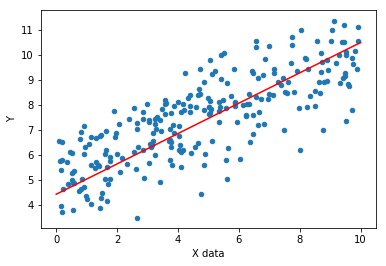

In [63]:
my_data.sample(250).plot(x = "X data", y = "Y", kind = "scatter")
plt.plot(np.linspace(0, 10, 10), predictions, "r")